##Prácticas 1


***¿Qué he aprendido en esta práctica?***

Los clasificadores Naïve Bayes (también conocidos como Independence Bayes) son una categoría de modelos probabilísticos supervisados ​​que, a pesar de basarse en supuestos subyacentes bastante simples, todavía se utilizan ampliamente en el mundo actual. Debido a que son muy rápidos incluso cuando se trabaja con grandes conjuntos de datos, y funcionan sorprendentemente bien a pesar de dichas suposiciones simplistas, se consultan y / o se utilizan para muchas tareas críticas del mundo real.
Este modelo toma cualquier punto de datos nuevo, nunca antes visto, como un nuevo correo electrónico, y (1) calculan las probabilidades de ese punto de datos (su conjunto particular de características) por separado como si perteneciera a cada clase diferente, luego (2) elija la clase más probable según la probabilidad más alta. Debido a que el denominador de Bayes anterior es una constante que permanece igual para todas las clases, por ejemplo, P (características del correo electrónico) es la misma independientemente de si la clase es "spam" o "no spam", no nos ayuda a comparar probabilidades.

***Los árboles de decisión*** están formados por nodos y su lectura se realiza de arriba hacia abajo. 

Dentro de un árbol de decisión distinguimos diferentes tipos de nodos: 

Primer nodo o nodo raíz: en él se produce la primera división en función de la variable más importante.
Nodos internos o intermedios: tras la primera división encontramos estos nodos, que vuelven a dividir el conjunto de datos en función de las variables.
Nodos terminales u hojas: se ubican en la parte inferior del esquema y su función es indicar la clasificación definitiva.
Otro concepto que debes tener claro es la profundidad de un árbol, que viene determinada por el número máximo de nodos de una rama.


descargar el set de datos y cargarlos en las variables de entrenamiento y de prueba

In [ ]:
!wget https://dihana.cps.unizar.es/~cadrete/mlbio/p1_data1.pkl.gz --no-check-certificate

import pickle, gzip
import numpy as np
import matplotlib.pyplot as plt



with gzip.open('p1_data1.pkl.gz', 'rb') as f:
 x_train, y_train, x_test, y_test = pickle.load(f)

--2021-04-09 12:17:33--  https://dihana.cps.unizar.es/~cadrete/mlbio/p1_data1.pkl.gz
Resolving dihana.cps.unizar.es (dihana.cps.unizar.es)... 155.210.153.34
Connecting to dihana.cps.unizar.es (dihana.cps.unizar.es)|155.210.153.34|:443... connected.
  Unable to locally verify the issuer's authority.
	requested host name ‘dihana.cps.unizar.es’.
HTTP request sent, awaiting response... 200 OK
Length: 23377 (23K) [application/x-gzip]
Saving to: ‘p1_data1.pkl.gz’

p1_data1.pkl.gz     100%[===================>]  22.83K   149KB/s    in 0.2s    

2021-04-09 12:17:34 (149 KB/s) - ‘p1_data1.pkl.gz’ saved [23377/23377]



Imprimir el tamaño del vector de la variable de entrenamiento y mostrar el tipo de datos de la misma

In [ ]:
print(x_train.shape)
print(x_train.dtype)

(1000, 2)
float64


Funcion para buscar un indice en el vector

In [ ]:
def find(x, value):
 return np.where(x == value)[0]

Buscamos los valores de los datos de entrenamiento para las clase de y_train
Indezamos los datos encontrados en la clase de x_train y como resultado tendremos dos vectores con 500 datos y 2 dimenciones.

In [ ]:
ind0 = find(y_train, 0)
ind1 = find(y_train, 1)

x_train_0 = x_train[ind0]
x_train_1 = x_train[ind1]


print(x_train_0.shape)


(500, 2)


mostramos los valores de las dos dimenciones de vector X_train.., con la captura de los valores de sus columnas.

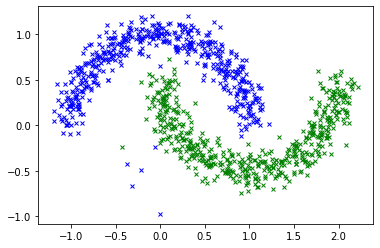

In [ ]:

plt.plot(x_train_0[:,0],x_train_0[:,1],'bx', markersize=4)
plt.plot(x_train_1[:,0],x_train_1[:,1],'gx', markersize=4)

# Pregunta d

Estimación de la media y la desviación típica de las clases x_train..

In [ ]:
m0 = np.mean( x_train_0, 0, keepdims=True)
s0 = np.std( x_train_0, 0, keepdims=True)

m1 = np.mean( x_train_1, 0, keepdims=True)
s1 = np.std( x_train_1, 0, keepdims=True)

print(m1.shape)
print(s1.shape)


(1, 2)
(1, 2)


##Implementación de la función que usa el algoritmo de rebustez numérica

Comprobando el tamaño de exponente

In [ ]:
def evaluate_log_like(x , m, s):
  exponente = -1/2 * np.sum(((x-m)/s)**2, axis=1)
  return exponente

print((evaluate_log_like(x_test, m0, s1)).shape)



(200,)


el de arriba era solo para verificar el inciso f de la práctica 1

In [ ]:
def evaluate_log_like(x , m, s):
  exponente = -1/2 * np.sum(((x-m)/s)**2, axis=1)
  d = x.shape[1]
  llk = -d/2 * np.log(2*np.pi) - 1/2 * np.sum(np.log(s**2)) + exponente

  return llk




inciso H, evaluamos los datos de prueba en la función de log-verosimitud

In [ ]:
like0 = evaluate_log_like( x_test, m0, s0 )
like1 = evaluate_log_like( x_test, m1, s1 )

print(like0[0])
print(like1[0])

-3.317787056255929
-1.5386251761870557


Calculamos el acierto y el error  del resultado de la función


In [ ]:
acc = np.mean( y_test == (like1 > like0).astype(int) )
err = np.mean( y_test != (like1 > like0).astype(int) )

print("Porciento de aceptados: ",acc *100, "%")
print("Porcientos de errores: ",err *100, "%")

Porciento de aceptados:  84.0 %
Porcientos de errores:  16.0 %


## 1.2 Datos de Imagen

leer datos 

In [ ]:
!wget https://dihana.cps.unizar.es/~cadrete/mlbio/p1_data2.pkl.gz --no-check-certificate
with gzip.open('p1_data2.pkl.gz', 'rb') as f:
 x_train, y_train, x_test, y_test = pickle.load(f)

 

--2021-04-09 12:28:12--  https://dihana.cps.unizar.es/~cadrete/mlbio/p1_data2.pkl.gz
Resolving dihana.cps.unizar.es (dihana.cps.unizar.es)... 155.210.153.34
Connecting to dihana.cps.unizar.es (dihana.cps.unizar.es)|155.210.153.34|:443... connected.
  Unable to locally verify the issuer's authority.
	requested host name ‘dihana.cps.unizar.es’.
HTTP request sent, awaiting response... 200 OK
Length: 2590291 (2.5M) [application/x-gzip]
Saving to: ‘p1_data2.pkl.gz’

p1_data2.pkl.gz     100%[===================>]   2.47M   918KB/s    in 2.8s    

2021-04-09 12:28:16 (918 KB/s) - ‘p1_data2.pkl.gz’ saved [2590291/2590291]



Funcion para plotear los datos extraidos

In [ ]:
def view_data(x, y):
 k = 0
 for i in range(4):
  for j in range(4):
    plt.subplot(4, 4, k+1)
    plt.imshow( x[k].reshape(16, 16), interpolation='none', cmap='gray')
    plt.title(r'$y_{%d}$ = %d' % (k, y[k]))
    plt.gca().axis('off')
    k += 1

Mostramos los datos

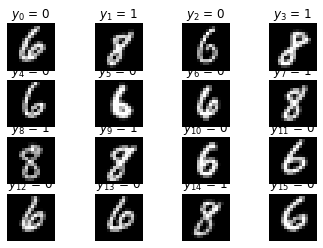

In [ ]:
view_data(x_train, y_train)

Inciso c) Siguendo con lo aprendido, podemos calcular el accierto y el error del modelo

In [ ]:
def evaluate_log_like(x , m, s):
  exponente = -1/2 * np.sum(((x-m)/s)**2, axis=1)
  d = x.shape[1]  
  llk = -d/2 * np.log(2*np.pi) - 1/2 * np.sum(np.log(s**2)) + exponente

  return llk




In [ ]:
ind0 = find(y_train, 0)
ind1 = find(y_train, 1)

x_train_0 = x_train[ind0]
x_train_1 = x_train[ind1]

k=10**-4

m0 = np.mean( x_train_0, 0, keepdims=True)+k
s0 = np.std( x_train_0, 0, keepdims=True)+k

m1 = np.mean( x_train_1, 0, keepdims=True)+k
s1 = np.std( x_train_1, 0, keepdims=True)+k

like0 = evaluate_log_like( x_test, m0, s0 )
like1 = evaluate_log_like( x_test, m1, s1 )

acc = np.mean( y_test == (like1 > like0).astype(int) )
err = np.mean( y_test != (like1 > like0).astype(int) )

print("Porciento de aceptados: ",acc *100, "%")
print("Porcientos de errores: ",err *100, "%")


Porciento de aceptados:  96.84265010351967 %
Porcientos de errores:  3.1573498964803313 %


## 2 Estudio de Clasifiadores

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.10,
random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred_test = model.predict(x_test)
err = np.sum( y_pred_test != y_test )
print('error rate test: %f %%' % (err / len(y_test) * 100))

error rate test: 2.803738 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=2)

model.fit(x_train, y_train)

y_pred_test = model.predict(x_test)
err = np.sum( y_pred_test != y_test )
print('error rate test: %f %%' % (err / len(y_test) * 100))


error rate test: 6.032285 %


Mejora el overfit

In [ ]:
model.score(x_test, y_test)

0.9396771452846219

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', min_samples_split=4)
model.fit(x_train, y_train)

y_pred_test = model.predict(x_test)
err = np.sum( y_pred_test != y_test )
print('error rate test: %f %%' % (err / len(y_test) * 100))

error rate test: 2.718777 %


***podemos ver que tan bien aprendio nuestro sistema***

In [ ]:
model.score(x_test, y_test)

0.9728122344944775

Aui vemos que aprendio mucho sobre el set de datos, algo que n siempre es bueno

In [ ]:
model.score(x_train, y_train)

0.9996223564954683

Graficar nuestro arbol, con todos los pasos y pregusntas

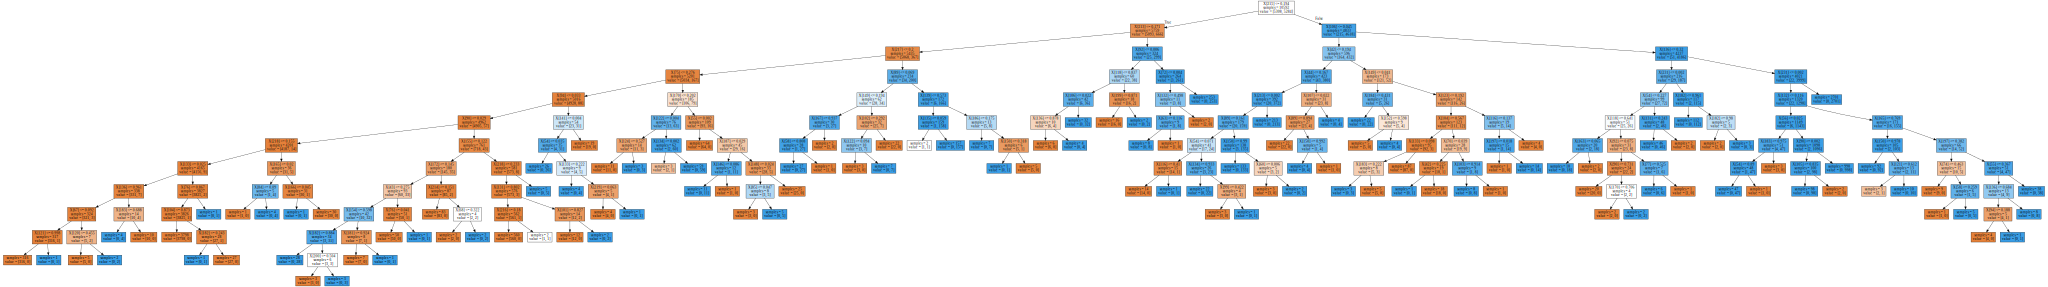

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model, out_file='arbol.dot', impurity=False, filled=True)

with open('arbol.dot') as t:
  dot_graph= t.read()
graphviz.Source(dot_graph)


# ***imagennes tienen 256 y esto plotea 2 dimensiones***

In [ ]:
def view_model_decision(model, x_train, y_train):
  xrange1 = np.linspace(-1.2, 2.4, 50)
  xrange2 = np.linspace(-1.2, 1.2, 50)
  X1, X2 = np.meshgrid(xrange1, xrange2)
  x = np.array( [X1.flatten(), X2.flatten()] ).T
  y = model.predict(x)
  plt.figure()
  plt.clf()
  plt.imshow(y.reshape(50,50), extent=[-1.2, 2.4, -1.2, 1.2],
  origin='lower', cmap='jet')
  ind0 = find(y_train, 0)
  ind1 = find(y_train, 1)
  plt.plot(x_train[ind0,0], x_train[ind0,1],'bx', markersize=4)
  plt.plot(x_train[ind1,0], x_train[ind1,1],'rx', markersize=4)
  plt.grid(True)
  plt.gca().legend(['y_n=0', 'y_n=1'], loc='upper right',fontsize=8)

In [ ]:
view_model_decision(model, x_train, y_train)

**Inciso f probamos con el algoritmo GHB de la libreria sklearn**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
err = np.sum( y_pred_test != y_test )
print('error rate test: %f %%' % (err / len(y_test) * 100))

print("aprendizaje del modelo:",model.score(x_test, y_test))

error rate test: 2.209006 %
aprendizaje del modelo: 0.9779099405267629


Conjuntos de modelos: bagging, boosting

In [ ]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10)

model

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=10)
model

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

##***SVM***

tiene muy buen porciento de aprendizaje

In [ ]:
from sklearn.svm import SVC
model = SVC()

model.fit(x_train, y_train)


y_pred_test = model.predict(x_test)
err = np.sum( y_pred_test != y_test )

print('error rate test: %f %%' % (err / len(y_test) * 100))
print('aprendizaje:', model.score(x_test, y_test))

error rate test: 0.424809 %
aprendizaje: 0.9957519116397621


In [ ]:
from sklearn.svm import SVC
model = SVC(C=1., kernel='rbf')

model.fit(x_train, y_train)


y_pred_test = model.predict(x_test)
err = np.sum( y_pred_test != y_test )

print('error rate test: %f %%' % (err / len(y_test) * 100))
print('aprendizaje:', model.score(x_test, y_test))

error rate test: 0.424809 %
aprendizaje: 0.9957519116397621


In [ ]:
from sklearn.svm import SVC
model = SVC(C=1.0, kernel='linear')

model.fit(x_train, y_train)


y_pred_test = model.predict(x_test)
err = np.sum( y_pred_test != y_test )

print('error rate test: %f %%' % (err / len(y_test) * 100))
print('aprendizaje:', model.score(x_test, y_test))

error rate test: 1.019541 %
aprendizaje: 0.989804587935429


In [ ]:
from sklearn.svm import SVC
model = SVC(C=1.0, kernel='rbf', gamma=2.0)

model.fit(x_train, y_train)


y_pred_test = model.predict(x_test)
err = np.sum( y_pred_test != y_test )

print('error rate test: %f %%' % (err / len(y_test) * 100))
print('aprendizaje:', model.score(x_test, y_test))

error rate test: 32.455395 %
aprendizaje: 0.675446049277825


In [ ]:
from sklearn.svm import SVC
model = SVC(C=1.0, kernel='poly', degree=2)

model.fit(x_train, y_train)


y_pred_test = model.predict(x_test)
err = np.sum( y_pred_test != y_test )

print('error rate test: %f %%' % (err / len(y_test) * 100))
print('aprendizaje:', model.score(x_test, y_test))

error rate test: 0.424809 %
aprendizaje: 0.9957519116397621


#####Cambiando los valores de C

cambiandole el valor de C, podemos ver que el porciento de error aumenta, pero el parendizaje sigue muy parecido

In [ ]:
from sklearn.svm import SVC

model = SVC(C=4., kernel='rbf')

model.fit(x_train, y_train)


y_pred_test = model.predict(x_test)
err = np.sum( y_pred_test != y_test )

print('error rate test: %f %%' % (err / len(y_test) * 100))
print('aprendizaje:', model.score(x_test, y_test))

error rate test: 0.424809 %
aprendizaje: 0.9957519116397621


En este caso cambiandole C=2 y gramma=3 podemos apreciar que el error aumneta mientra que el parendizaje disminuye.

In [ ]:
from sklearn.svm import SVC
model = SVC(C=2.0, kernel='rbf', gamma=3.0)

model.fit(x_train, y_train)


y_pred_test = model.predict(x_test)
err = np.sum( y_pred_test != y_test )

print('error rate test: %f %%' % (err / len(y_test) * 100))
print('aprendizaje:', model.score(x_test, y_test))

error rate test: 33.389975 %
aprendizaje: 0.6661002548853017


## Ejercicio 2.2

***Importamos nuestras librerias a usar y descargamos nuestro set de datos***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pickle, gzip
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz
import graphviz

In [ ]:
!wget https://dihana.cps.unizar.es/~cadrete/mlbio/p1_data2.pkl.gz --no-check-certificate
with gzip.open('p1_data2.pkl.gz', 'rb') as f:
 x_train, y_train, x_test, y_test = pickle.load(f)

#! gzip -d p1_data2.pkl.gz

--2021-04-09 12:33:11--  https://dihana.cps.unizar.es/~cadrete/mlbio/p1_data2.pkl.gz
Resolving dihana.cps.unizar.es (dihana.cps.unizar.es)... 155.210.153.34
Connecting to dihana.cps.unizar.es (dihana.cps.unizar.es)|155.210.153.34|:443... connected.
  Unable to locally verify the issuer's authority.
	requested host name ‘dihana.cps.unizar.es’.
HTTP request sent, awaiting response... 200 OK
Length: 2590291 (2.5M) [application/x-gzip]
Saving to: ‘p1_data2.pkl.gz.1’

p1_data2.pkl.gz.1   100%[===================>]   2.47M   918KB/s    in 2.8s    

2021-04-09 12:33:14 (918 KB/s) - ‘p1_data2.pkl.gz.1’ saved [2590291/2590291]



***ahora iniciamos nuestro modelo***

In [ ]:
model = DecisionTreeClassifier(max_depth=None)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

***Entrenamos nuestro modelo con los set de datos de entrenamiento***                     
***podemos ver que tan bien aprendio***

In [ ]:
model.fit(x_train, y_train)


y_pred_test = model.predict(x_test)
err = np.sum( y_pred_test != y_test )

print('error rate test: %f %%' % (err / len(y_test) * 100))
print('aprendizaje:', model.score(x_test, y_test))

error rate test: 3.053830 %
aprendizaje: 0.9694616977225673


***Si  le cambiamos la propiedad de max_depth vemos que el error disminuye y aumenta el aprendizaje***

In [ ]:
model = DecisionTreeClassifier(max_depth=9)
model.fit(x_train, y_train)
model.score(x_test, y_test)

y_pred_test = model.predict(x_test)
err = np.sum( y_pred_test != y_test )

print('error rate test: %f %%' % (err / len(y_test) * 100))
print('aprendizaje:', model.score(x_test, y_test))


error rate test: 2.639752 %
aprendizaje: 0.9736024844720497


***con esto encontramos cual es el mejor valor de max_depth para la prediccion***

In [ ]:
max_depth_range = list(range(1, 10))
accuracy = []
for depth in max_depth_range:    
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    accuracy.append(score)

accuracy

[0.9213250517598344,
 0.9404761904761905,
 0.9653209109730849,
 0.9704968944099379,
 0.9772256728778468,
 0.974120082815735,
 0.9761904761904762,
 0.977743271221532,
 0.974120082815735]

##Exportando a pdf

In [ ]:
!ls drive/MyDrive/Colab\ Notebooks


'Copia de Práctica 2a.ipynb'	'Práctica 2a.ipynb'   uso_keras_cpu.ipynb
'Copia de Practice1 (1).ipynb'	 Practicas1.ipynb
'Copia de Practice1.ipynb'	 Practice1.ipynb


In [ ]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Practice1.ipynb')